In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = '../9.Regression/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)

In [28]:
x_prime = data[range(4)]
y = pd.Categorical(data[4]).codes
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, \
                                                               train_size= 0.7,\
                                                               random_state=0)


特征： 花萼长度  +  花萼宽度
OBB Score:  0.771428571429
	训练集准确率: 86.6667%
	测试集准确率: 71.1111%
特征： 花萼长度  +  花瓣长度
OBB Score:  0.942857142857
	训练集准确率: 98.0952%
	测试集准确率: 93.3333%
特征： 花萼长度  +  花瓣宽度
OBB Score:  0.92380952381
	训练集准确率: 97.1429%
	测试集准确率: 97.7778%
特征： 花萼宽度  +  花瓣长度
OBB Score:  0.933333333333
	训练集准确率: 96.1905%
	测试集准确率: 93.3333%
特征： 花萼宽度  +  花瓣宽度
OBB Score:  0.895238095238
	训练集准确率: 98.0952%
	测试集准确率: 93.3333%
特征： 花瓣长度  +  花瓣宽度
OBB Score:  0.952380952381
	训练集准确率: 99.0476%
	测试集准确率: 97.7778%


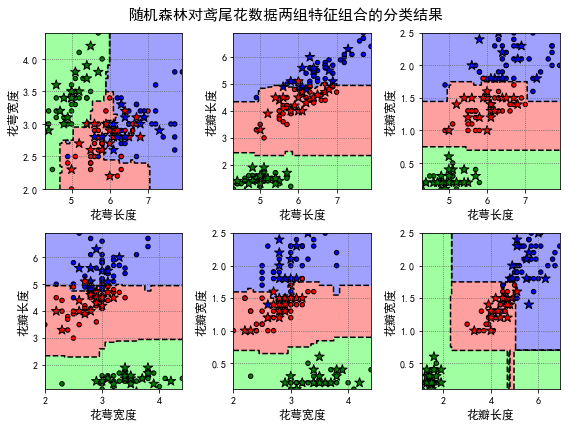

In [29]:
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

plt.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
for i, pair in enumerate(feature_pairs):
    #准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]
    
    #决策树学习
    model = RandomForestClassifier(n_estimators=100, criterion='entropy', \
                                  max_depth=5, oob_score=True)
    model.fit(x_train, y_train)
    
    #绘图分类背景数据集构造
    N,M = 500,500
    x1_min, x2_min = x_train.min()
    x1_max, x2_max = x_train.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    
    #预测
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    print '特征：',iris_feature[pair[0]], ' + ', iris_feature[pair[1]]
    print 'OBB Score: ', model.oob_score_
    print '\t训练集准确率: %.4f%%' % (100 * acc_train)
    print '\t测试集准确率: %.4f%%' % (100 * acc_test)
    
    #绘图
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    
    plt.subplot(2, 3, i+1)
    plt.contour(x1, x2, y_hat, colors='k', levels=[0,1], antialiased=True, \
               linestyles='--', lw=1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)
    plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, \
               edgecolors='k', cmap=cm_dark, label=u'训练集')
    plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=100, \
               marker='*', edgecolors='k', cmap=cm_dark, label=u'测试集')
    plt.xlabel(iris_feature[pair[0]], fontsize=12)
    plt.ylabel(iris_feature[pair[1]], fontsize=12)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True, ls=':', color='#606060')
plt.suptitle(u'随机森林对鸢尾花数据两组特征组合的分类结果', fontsize=15)
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.show()